1. Installing tesorflow and keras and print their versions

In [1]:
! pip install tensorflow

In [2]:
! pip install keras 

In [3]:
import keras
import tensorflow as tf


In [4]:
print(tf.__version__)
print(keras.__version__)

2.12.0
2.12.0


2. Load the wine quality dataset and explore it's dimension

In [5]:
import pandas as pd
import numpy as np

In [6]:
## Reading the dataset
df=pd.read_csv('./wine.csv')

In [7]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [8]:
df.shape

(1599, 12)

3. Check for null values, identify categorical variables, and encode them.

In [9]:
## Check for null
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

- No null values

In [10]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [11]:
df['quality'].unique()

array(['bad', 'good'], dtype=object)

In [12]:
## Encoding the Categorical Features
df['quality']=df['quality'].map({'good':1,'bad':0})

In [13]:
df['quality'].unique()

array([0, 1], dtype=int64)

4. Separate the features and target variables from the dataframe.

In [14]:
X=df.drop(columns=['quality'])
y=df['quality']

5. Perform a train-test split and divide the data into training, validation, and test datasets.

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=21)

In [17]:
X_test.shape,X_train.shape

((320, 11), (1279, 11))

6. Perform scaling on the dataset.

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

7. Create at least 2 hidden layers and an output layer for the binary categorical variables.

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint,TensorBoard

In [21]:
## Defining a Model
model=Sequential()

In [22]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
751,8.3,0.650,0.10,2.9,0.089,17.0,40.0,0.99803,3.29,0.55,9.5
370,6.9,0.765,0.02,2.3,0.063,35.0,63.0,0.99750,3.57,0.78,9.9
374,14.0,0.410,0.63,3.8,0.089,6.0,47.0,1.00140,3.01,0.81,10.8
537,8.1,0.825,0.24,2.1,0.084,5.0,13.0,0.99720,3.37,0.77,10.7
708,7.8,0.545,0.12,2.5,0.068,11.0,35.0,0.99600,3.34,0.61,11.6


In [23]:
model.add(Flatten(input_shape=(11,)))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

9. Print the model summary.

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 11)                0         
                                                                 
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


10. Use binary cross-entropy as the loss function, Adam optimizer, and include the metric ['accuracy'].

In [25]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

12. Fit the model to the data, incorporating the TensorBoard, Early Stopping, and ModelCheckpoint
callbacks.

In [27]:
history=model.fit(X_train,y_train,validation_split=0.15,epochs=10,verbose=1,shuffle=True,batch_size=20)

Epoch 1/10
55/55 [==============================] - 1s 7ms/step - loss: 0.6777 - accuracy: 0.6247 - val_loss: 0.7128 - val_accuracy: 0.5469
Epoch 2/10
55/55 [==============================] - 0s 3ms/step - loss: 0.6352 - accuracy: 0.6228 - val_loss: 0.6298 - val_accuracy: 0.6250
Epoch 3/10
55/55 [==============================] - 0s 2ms/step - loss: 0.6253 - accuracy: 0.6440 - val_loss: 0.6362 - val_accuracy: 0.6146
Epoch 4/10
55/55 [==============================] - 0s 3ms/step - loss: 0.6190 - accuracy: 0.6495 - val_loss: 0.6691 - val_accuracy: 0.6198
Epoch 5/10
55/55 [==============================] - 0s 3ms/step - loss: 0.6187 - accuracy: 0.6596 - val_loss: 0.6176 - val_accuracy: 0.6458
Epoch 6/10
55/55 [==============================] - 0s 2ms/step - loss: 0.6185 - accuracy: 0.6587 - val_loss: 0.6669 - val_accuracy: 0.6771
Epoch 7/10
55/55 [==============================] - 0s 3ms/step - loss: 0.6175 - accuracy: 0.6513 - val_loss: 0.6489 - val_accuracy: 0.6250
Epoch 8/10
55/55 [==

13. Obtain the Model Parameters

In [28]:
model.get_weights()

[array([[ 7.82281831e-02,  6.25760555e-02,  2.57358607e-02,
          4.28367741e-02,  2.38424584e-01, -4.44519073e-02,
         -1.37326624e-02, -1.25368237e-02, -2.31375754e-01,
          4.36464548e-02, -1.56200349e-01,  1.33287162e-01,
         -1.84333533e-01,  1.13625884e-01,  4.22419906e-02,
         -2.60886222e-01, -4.75132614e-02, -2.67454207e-01,
          2.32391223e-01, -2.21075967e-01, -1.44577920e-01,
         -1.98488966e-01,  9.37408432e-02,  2.52586722e-01,
          9.13210586e-02, -1.68289408e-01, -1.35275424e-01,
          6.79065138e-02,  7.32248798e-02,  8.87801349e-02,
          4.54732031e-02,  2.26216272e-01, -1.80989504e-03,
         -1.75430819e-01, -1.21655457e-01,  3.76267433e-02,
          1.81923464e-01,  1.78800970e-01, -2.24132128e-02,
         -2.69965142e-01,  4.61865915e-03, -4.10578325e-02,
         -2.87059471e-02,  2.26615369e-01, -9.34659988e-02,
          6.82821944e-02, -2.29683131e-01,  2.45172694e-01,
         -7.40603060e-02,  1.32101968e-0

14. Store the model's training history as a Pandas DataFrame.

In [30]:
df=pd.DataFrame(history.history)

In [31]:
df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.677661,0.624655,0.712806,0.546875
1,0.635208,0.622815,0.629834,0.625000
2,0.625258,0.643974,0.636205,0.614583
3,0.618962,0.649494,0.669091,0.619792
4,0.618703,0.659614,0.617569,0.645833


15. Plot the model's training history.

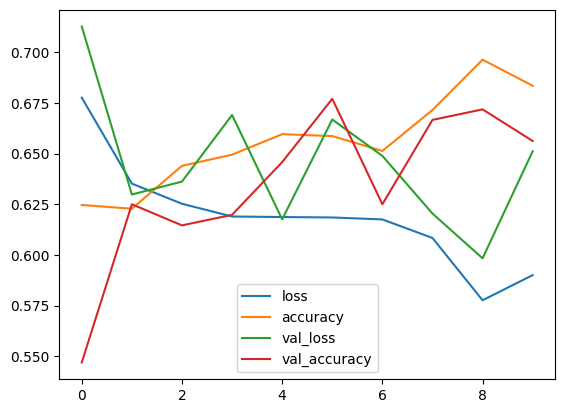

In [32]:
import matplotlib.pyplot as plt
df.plot()
plt.show()

16. Evaluate the model's performance using the test data.

In [33]:
model.evaluate(X_test,y_test)

10/10 [==============================] - 0s 3ms/step - loss: 0.6453 - accuracy: 0.6719


[0.645348310470581, 0.671875]